# AQFT en tket

In [1]:
from pytket import Circuit
from pytket.utils import Graph
from pytket.backends.ibm import AerBackend, AerStateBackend
from qiskit.visualization import plot_bloch_multivector

In [2]:
def aqft_rotations(circuit):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    circuit.H(3)
    circuit.CRz(0.5, 2, 3) # pasamos el numero, el qubit de control
                                        # y luego el objetivo.
    circuit.CRz(0.25, 1, 3)
    
    circuit.H(2)
    circuit.CRz(0.5, 1, 2)
    circuit.CRz(0.25, 0, 2)
    
    circuit.H(1)
    circuit.CRz(0.5, 0, 1)
    
    circuit.H(0)
    
    circuit.SWAP(0,3)
    circuit.SWAP(1,2)

In [3]:
circ = Circuit(4)
circ.X(0)
circ.X(1)
aqft_rotations(circ)

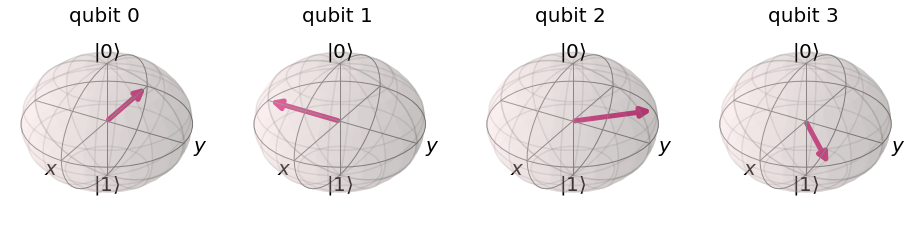

In [4]:
backend = AerStateBackend()
backend.compile_circuit(circ)

handle = backend.process_circuit(circ)
state = backend.get_result(handle).get_state()
plot_bloch_multivector(state)

In [5]:
def aqft_rotationsInverse(circuit):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    circuit.SWAP(0,3)
    circuit.SWAP(1,2)
    
    circuit.H(0)

    circuit.CRz(-0.5, 0, 1)
    circuit.H(1) 

    circuit.CRz(-0.25, 0, 2)
    circuit.CRz(-0.5, 1, 2)
    circuit.H(2) 

    circuit.CRz(-0.25, 1, 3)
    circuit.CRz(-0.5, 2, 3) 
    circuit.H(3) 


In [6]:
aqft_rotationsInverse(circ)

In [7]:
#circ.Measure(0,0)
#circ.Measure(1,1)
#circ.Measure(2,2)
#circ.Measure(3,3)
circ.measure_all()

[U3(1*PI, 0*PI, 1*PI) q[0]; U3(1*PI, 0*PI, 1*PI) q[1]; U3(3.5*PI, 1.25*PI, 0*PI) q[3]; CX q[2], q[3]; U1(1.75*PI) q[3]; CX q[2], q[3]; U3(3.5*PI, 1.25*PI, 0*PI) q[2]; U1(0.125*PI) q[3]; CX q[1], q[3]; U1(1.875*PI) q[3]; CX q[1], q[3]; CX q[1], q[2]; U1(1.75*PI) q[2]; CX q[1], q[2]; U3(3.5*PI, 1.25*PI, 0*PI) q[1]; U1(0.125*PI) q[2]; CX q[0], q[2]; U1(1.875*PI) q[2]; CX q[0], q[2]; CX q[0], q[1]; U1(1.75*PI) q[1]; CX q[0], q[1]; U3(0.5*PI, 0*PI, 1*PI) q[0]; CX q[1], q[2]; CX q[0], q[3]; CX q[2], q[1]; CX q[3], q[0]; CX q[1], q[2]; CX q[0], q[3]; SWAP q[1], q[2]; SWAP q[0], q[3]; H q[0]; CRz(3.5*PI) q[0], q[1]; CRz(3.75*PI) q[0], q[2]; H q[1]; Measure q[0] --> c[0]; CRz(3.5*PI) q[1], q[2]; CRz(3.75*PI) q[1], q[3]; H q[2]; Measure q[1] --> c[1]; CRz(3.5*PI) q[2], q[3]; Measure q[2] --> c[2]; H q[3]; Measure q[3] --> c[3]; ]

In [8]:
b = AerBackend()
b.compile_circuit(circ)
handle = b.process_circuit(circ, 1000)
result = b.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(1, 1, 0, 0): 1000})
